In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/pruo9/Downloads/dataset.csv")

In [3]:
# convert to date/time
df['organization_created_at'] = pd.to_datetime(df['organization_created_at'])
df['first_run_at'] = pd.to_datetime(df['first_run_at'])
df['first_used_feature_a'] = pd.to_datetime(df['first_used_feature_a'])
df['first_used_feature_b'] = pd.to_datetime(df['first_used_feature_b'])
df['subscription_created_at'] = pd.to_datetime(df['subscription_created_at'])

In [4]:
# add new columns
df['time_to_first_run'] = df['first_run_at'] - df['organization_created_at']

df['time_to_feature_a'] = df['first_used_feature_a'] - df['organization_created_at']

df['time_to_feature_b'] = df['first_used_feature_b'] - df['organization_created_at']

df['time_to_subscribe'] = df['subscription_created_at'] - df['organization_created_at']

df['subscribe_within_6'] = np.where((df['time_to_subscribe'] > '0 days') & (df['time_to_subscribe'] < '42 days'), 1, 0)

df['a_before_sub'] = np.where(df['time_to_subscribe'] > df['time_to_feature_a'], 1, 0)

df['b_before_sub'] = np.where(df['time_to_subscribe'] > df['time_to_feature_b'], 1, 0)

df['used_a'] = np.where(df['first_used_feature_a'].isna(), 0, 1)

df['used_b'] = np.where(df['first_used_feature_b'].isna(), 0, 1)

df['made_run'] = np.where(df['first_run_at'].isna(), 0, 1)

<AxesSubplot:>

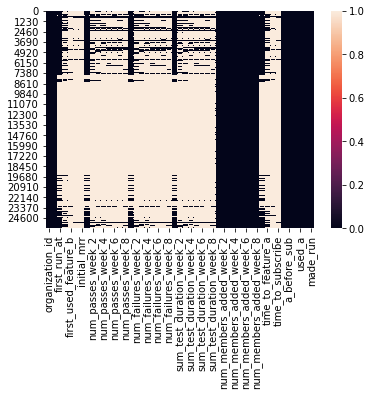

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#visualize null values
sns.heatmap(df.isnull())

In [6]:
values = {"num_passes_week_1": 0, "num_passes_week_2": 0, "num_passes_week_3": 0, "num_passes_week_4": 0, "num_passes_week_5": 0, "num_passes_week_6": 0, "num_passes_week_7": 0, "num_passes_week_8": 0, "num_failures_week_1": 0, "num_failures_week_2": 0, "num_failures_week_3": 0, "num_failures_week_4": 0, "num_failures_week_5": 0, "num_failures_week_6": 0, "num_failures_week_7": 0, "num_failures_week_8": 0, "sum_test_duration_week_1": 0, "sum_test_duration_week_2": 0, "sum_test_duration_week_3": 0, "sum_test_duration_week_4": 0, "sum_test_duration_week_5": 0, "sum_test_duration_week_6": 0, "sum_test_duration_week_7": 0, "sum_test_duration_week_8": 0}
df = df.fillna(value=values)

<AxesSubplot:>

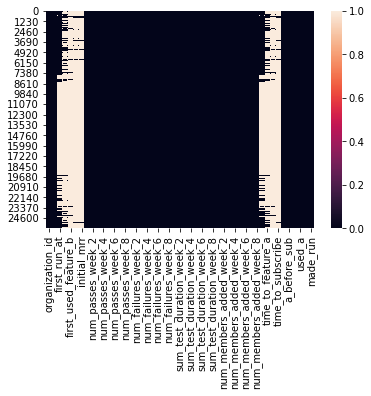

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#visualize null values
sns.heatmap(df.isnull())

<AxesSubplot:>

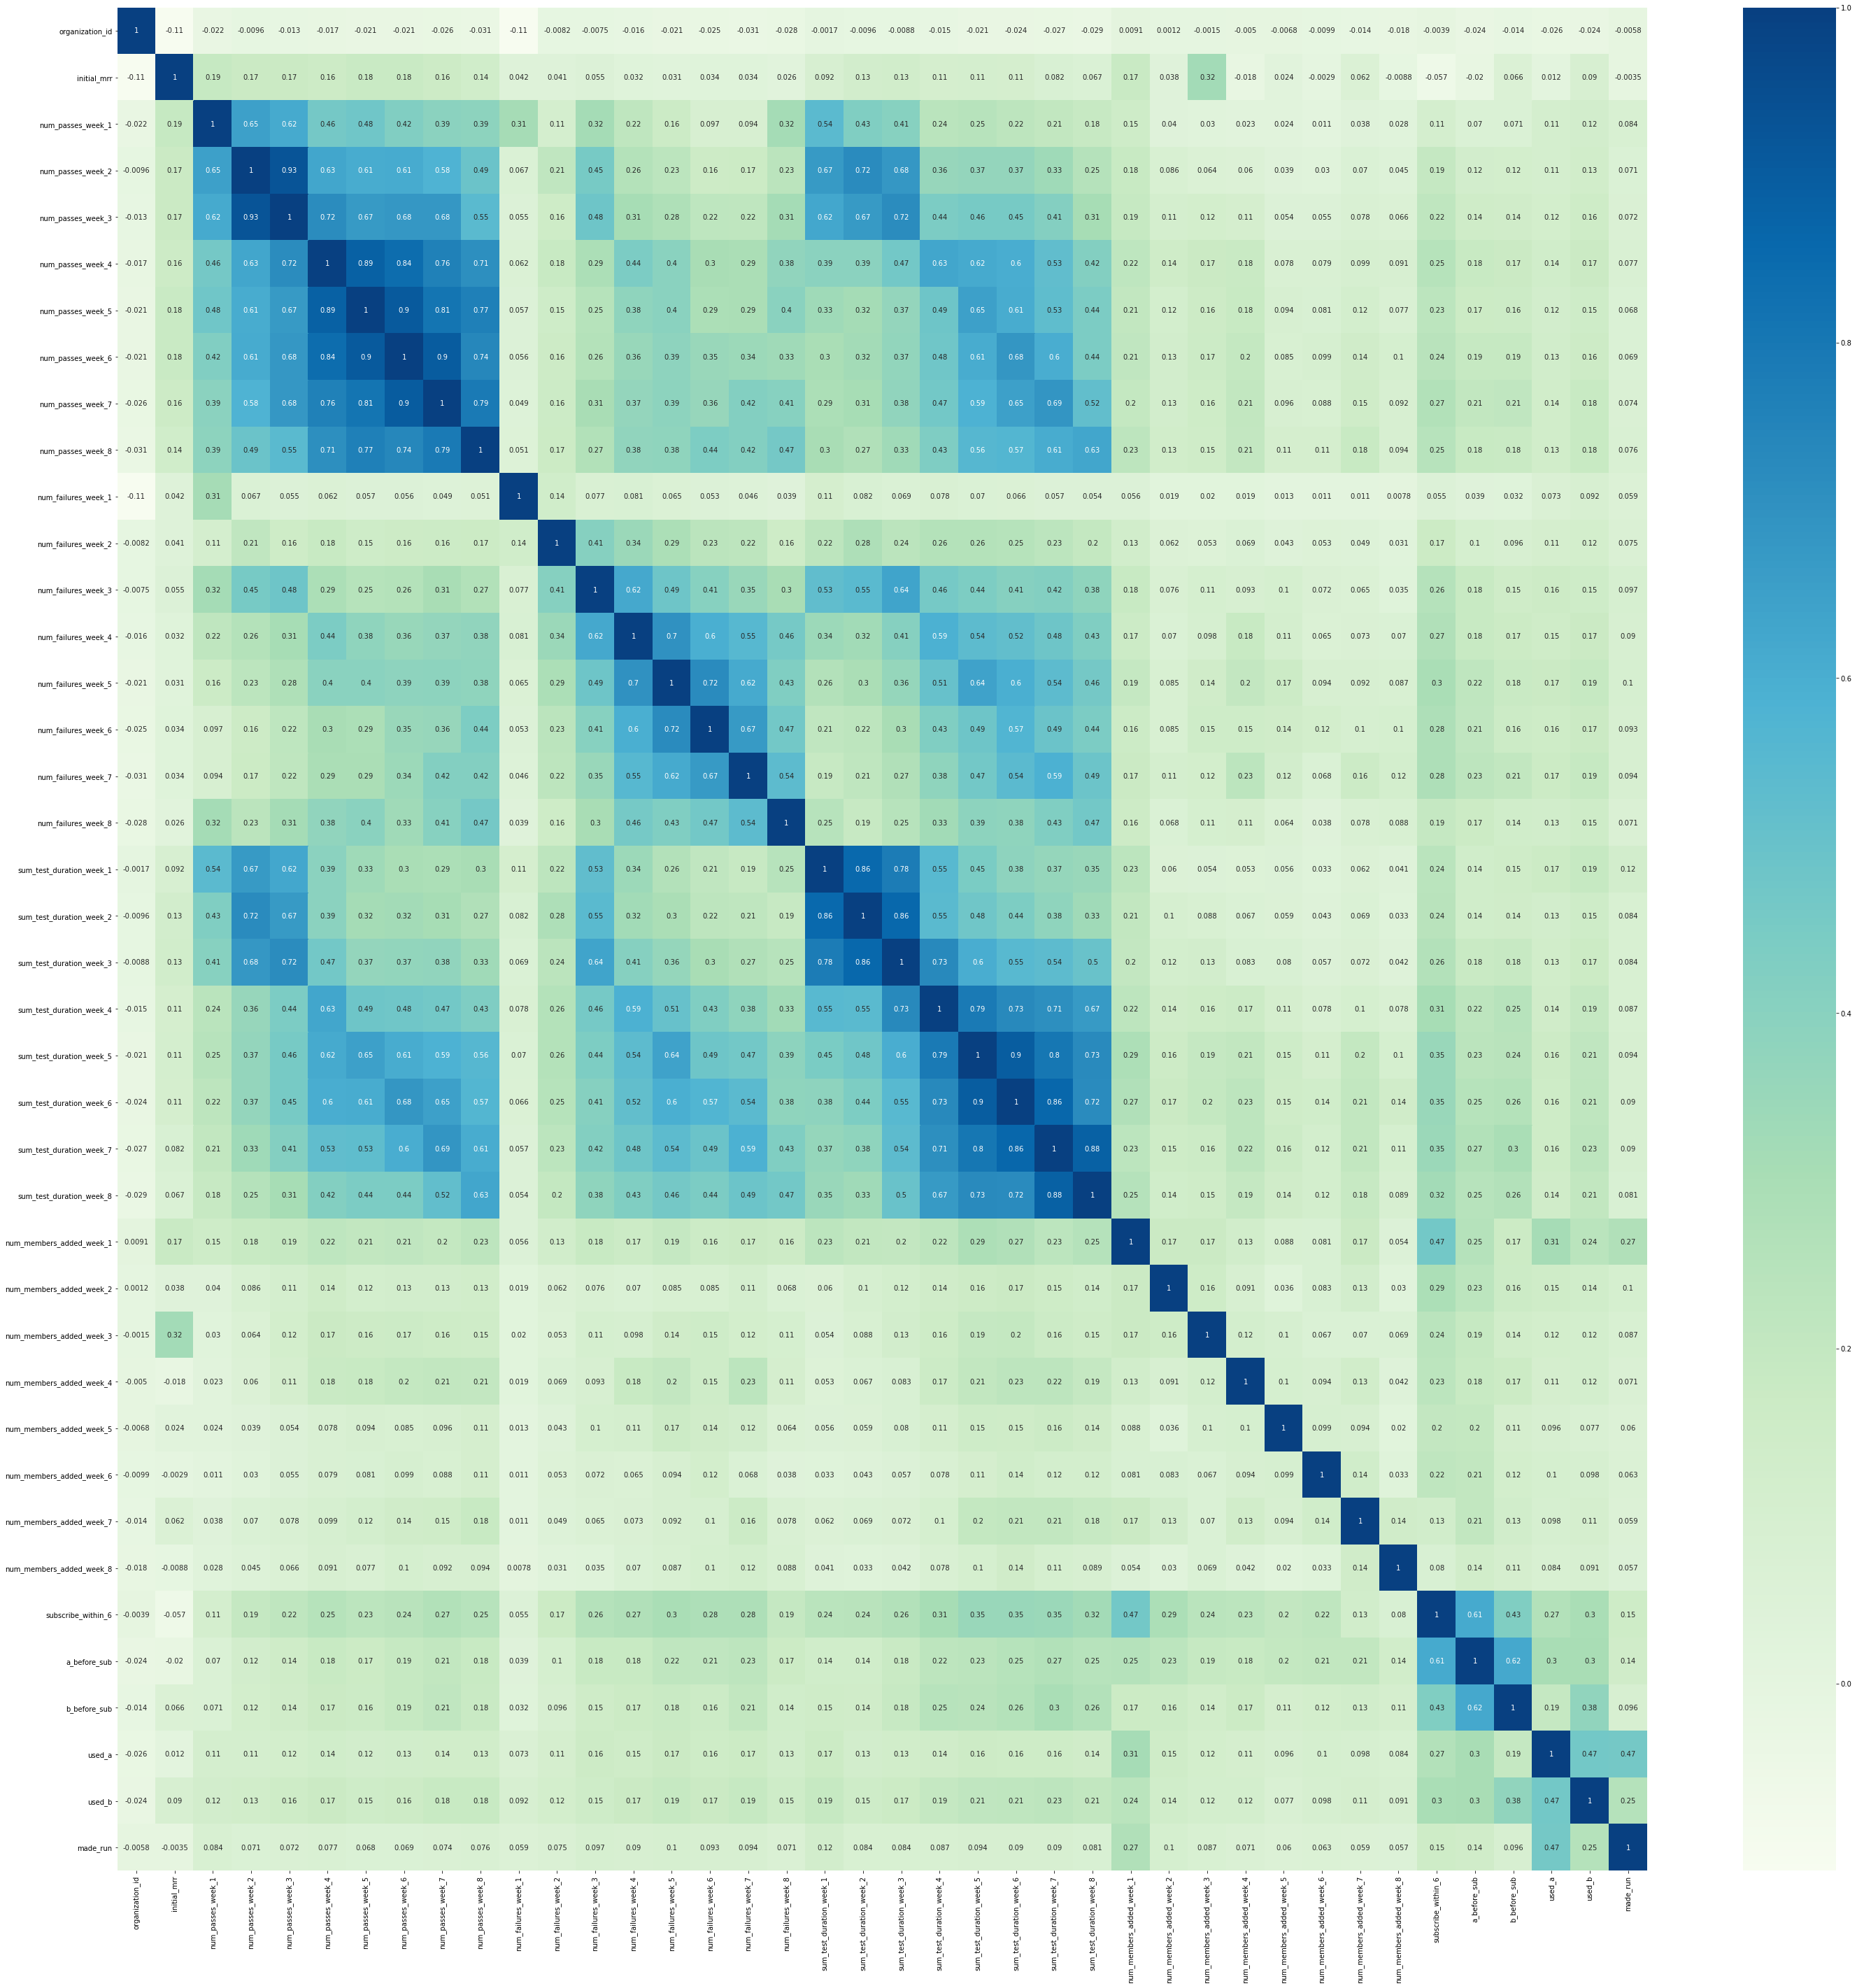

In [12]:
plt.figure(1, figsize = (49,49))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

In [8]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [9]:
from sklearn.model_selection import train_test_split

X = df[['num_passes_week_1', 'num_passes_week_4', 'num_failures_week_1', 'num_failures_week_4', 'sum_test_duration_week_1', 'sum_test_duration_week_4', 'a_before_sub', 'b_before_sub', 'used_a', 'used_b', 'num_members_added_week_1', 'num_members_added_week_2', 'num_members_added_week_3', 'num_members_added_week_4', 'num_members_added_week_5', 'num_members_added_week_6']]
y = df['subscribe_within_6']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

log_reg = sm.Logit(exog = X_train, endog = y_train.astype(float)).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.142862
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     subscribe_within_6   No. Observations:                18068
Model:                          Logit   Df Residuals:                    18052
Method:                           MLE   Df Model:                           15
Date:                Fri, 13 Aug 2021   Pseudo R-squ.:                 -0.5049
Time:                        21:37:05   Log-Likelihood:                -2581.2
converged:                       True   LL-Null:                       -1715.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
num_passes_week_1        -2.192e-05   2.32e-05     -0.945      0.345   -6.74e-05

In [10]:
# performing predictions on the test datdaset
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
  
# comparing original and predicted values of y

from sklearn.metrics import (confusion_matrix, accuracy_score)
  
# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[7573   44]
 [  71   56]]


In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9892820247933884


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[7575,   42],
       [  41,   86]], dtype=int64)